<a href="https://colab.research.google.com/github/MaxSivo/nobel_prize_analysis/blob/main/Nobel_Prize_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning



In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
df_data.year.head(1)

0    1901
Name: year, dtype: int64

In [ ]:
df_data.year.tail(1)

961    2020
Name: year, dtype: int64

### Check for Duplicates

In [ ]:
df_data.duplicated().any()

False

### Check for NaN Values

In [ ]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [ ]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [ ]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions


* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
type(df_data.birth_date[1])

pandas._libs.tslibs.timestamps.Timestamp

#### Add a Column with the Prize Share as a Percentage

In [ ]:
seperate_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(seperate_values[0])
denominator = pd.to_numeric(seperate_values[1])
df_data['share_pct'] = numerator / denominator 
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [ ]:
gender_count = df_data.sex.value_counts()

In [ ]:
gender_count

Male      876
Female     58
Name: sex, dtype: int64

In [ ]:
fig = px.pie(values=gender_count.values, names=gender_count.index, hole=0.4, 
             title="Share of Nobel Prizes Won by Women")
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')


fig.show()

# Who were the first 3 Women to Win the Nobel Prize?


In [ ]:
df_data[df_data.sex == 'Female'].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [ ]:
df_data[df_data.full_name.duplicated()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [ ]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
multiple_winners

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


In [ ]:
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


# Number of Prizes per Category



In [ ]:
prizes = df_data.category.value_counts()

In [ ]:
bar = px.bar(x=prizes.index, y=prizes.values, title='Prizes by Category',
              color = prizes.values, color_continuous_scale='aggrnyl')
bar.update_layout(xaxis_title = 'Category',
                  yaxis_title = '# of Prizes',
                  coloraxis_showscale=False)
bar.show()

In [ ]:
df_data[df_data.category == 'Economics'].sort_values('year')

# Male and Female Winners by Category



In [ ]:
mf_data = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize':pd.Series.count})
mf_data.sort_values('prize', ascending=False, inplace=True)
mf_data.head(3)

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179


In [ ]:
bar = px.bar(x=mf_data.category, y=mf_data.prize, color=mf_data.sex,
             title='Prizes Won By Sex')

bar.update_layout(xaxis_title="Category",
                  yaxis_title="# of Prizes")

bar.show()

# Number of Prizes Awarded Over Time


In [ ]:
prize_per_year = df_data.groupby(by='year').prize.count()
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [ ]:
moving_average = prize_per_year.rolling(window=5).mean()
moving_average.tail()

year
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, dtype: float64

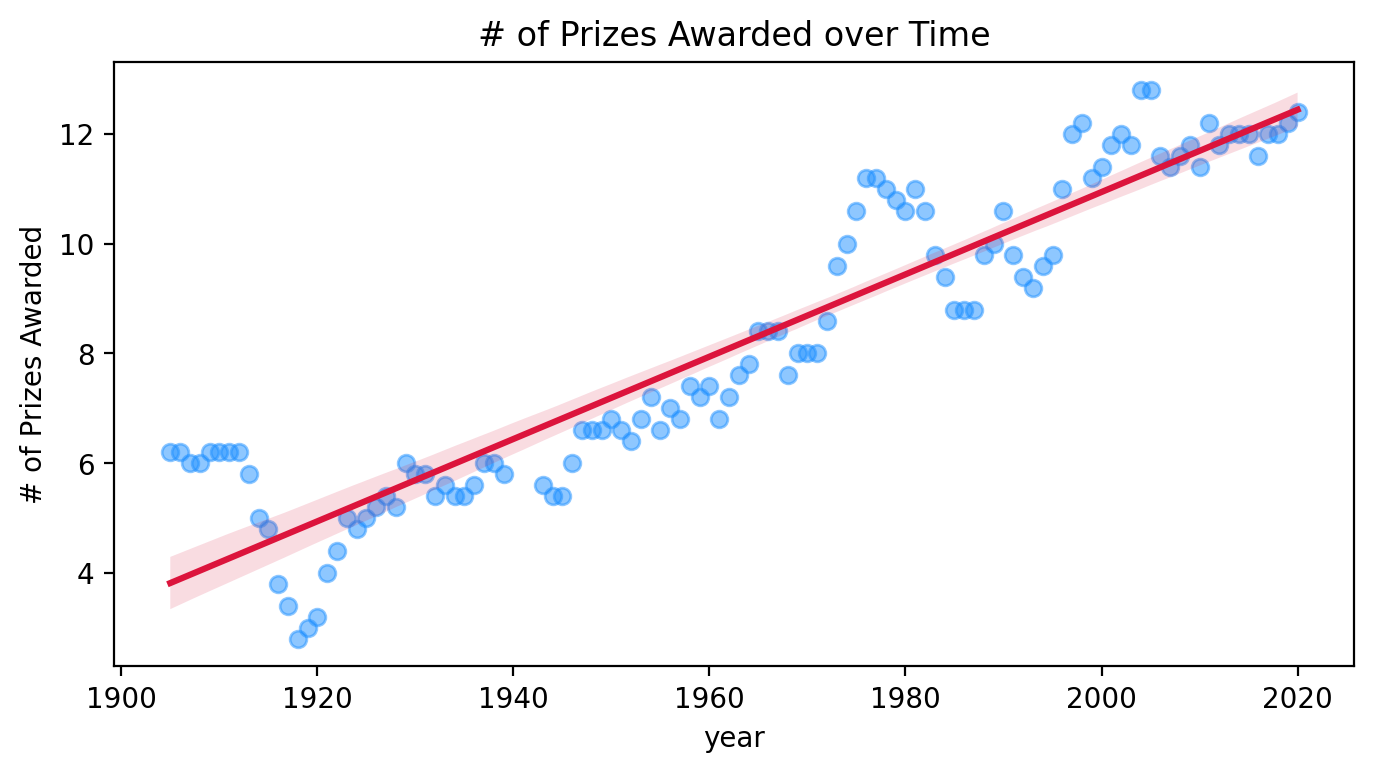

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
plot = sns.regplot(data=moving_average, 
            x=prize_per_year.index,
            y=moving_average.values,
            line_kws = {'color': 'crimson'},
            color='dodgerblue',
            scatter_kws = {'alpha': 0.5})
plot.set(xlabel='year',
         ylabel='# of Prizes Awarded',
         title='# of Prizes Awarded over Time')

plt.show()

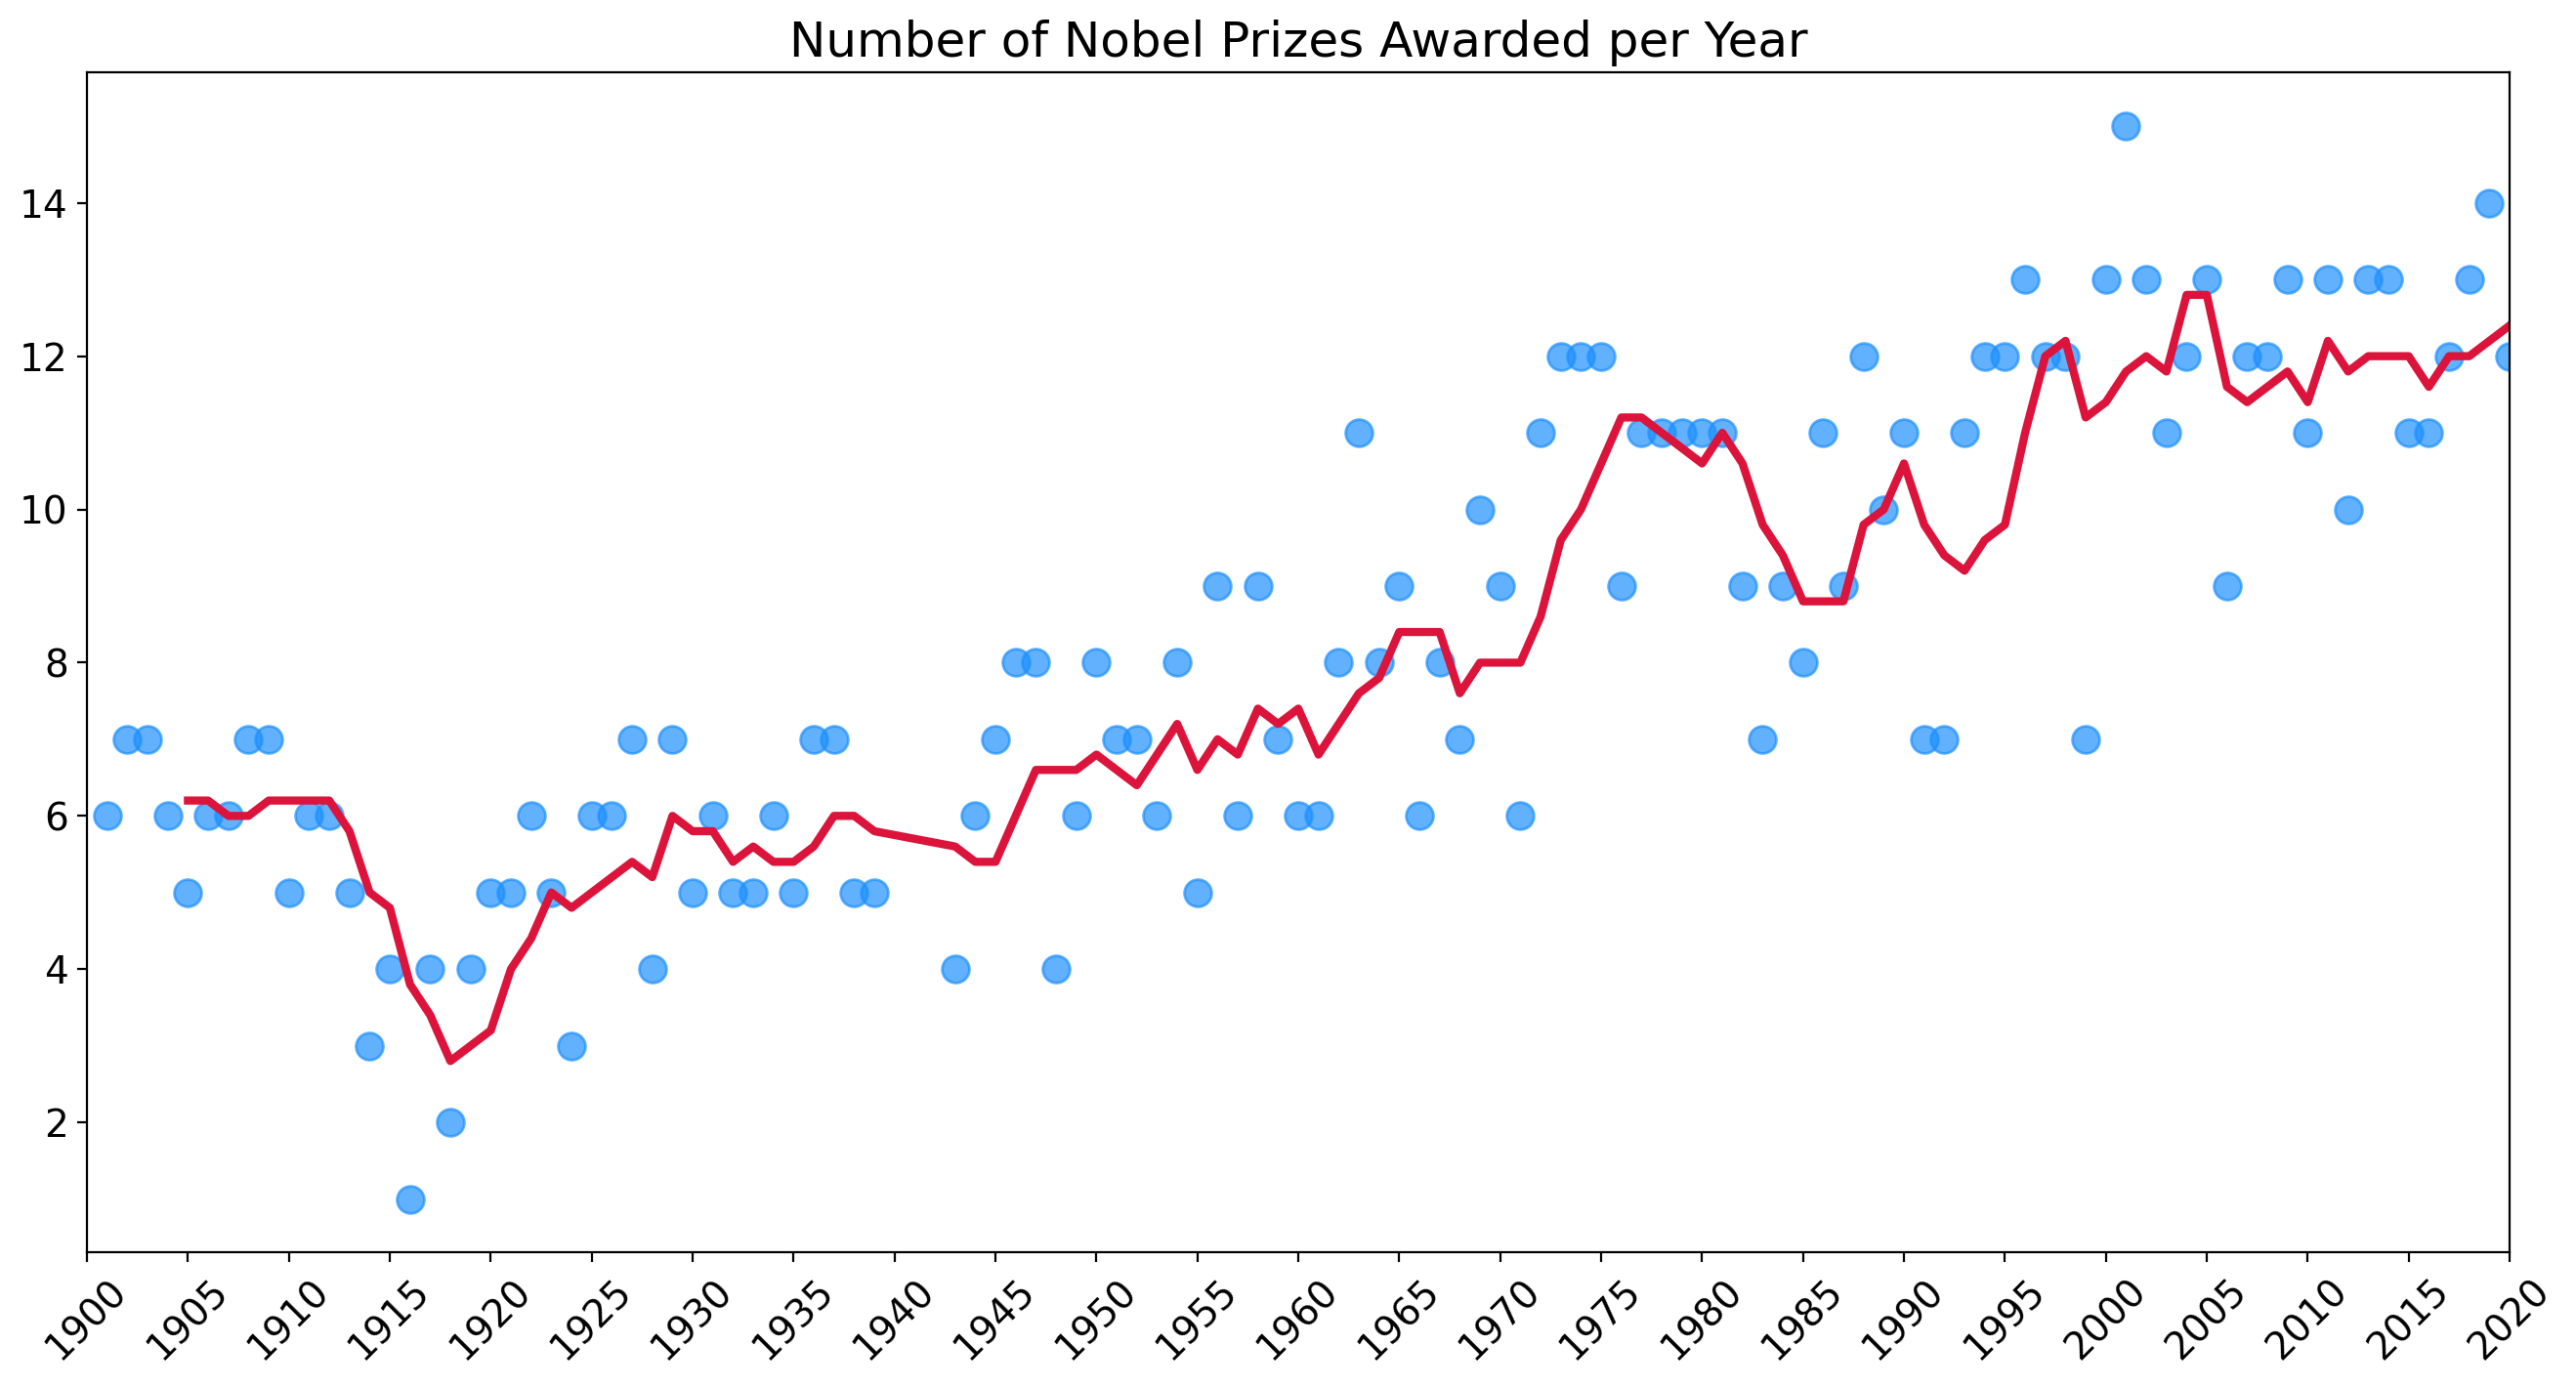

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 


# Are More Prizes Shared Than Before?



In [ ]:
prize_share = df_data.groupby('year').share_pct.mean()

In [ ]:
percent_rolling = prize_share.rolling(window=5).mean()
percent_rolling.head(15)

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   0.82
1906   0.82
1907   0.84
1908   0.84
1909   0.82
1910   0.82
1911   0.82
1912   0.82
1913   0.88
1914   0.93
1915   0.88
Name: share_pct, dtype: float64

Text(0.5, 0, 'Year')

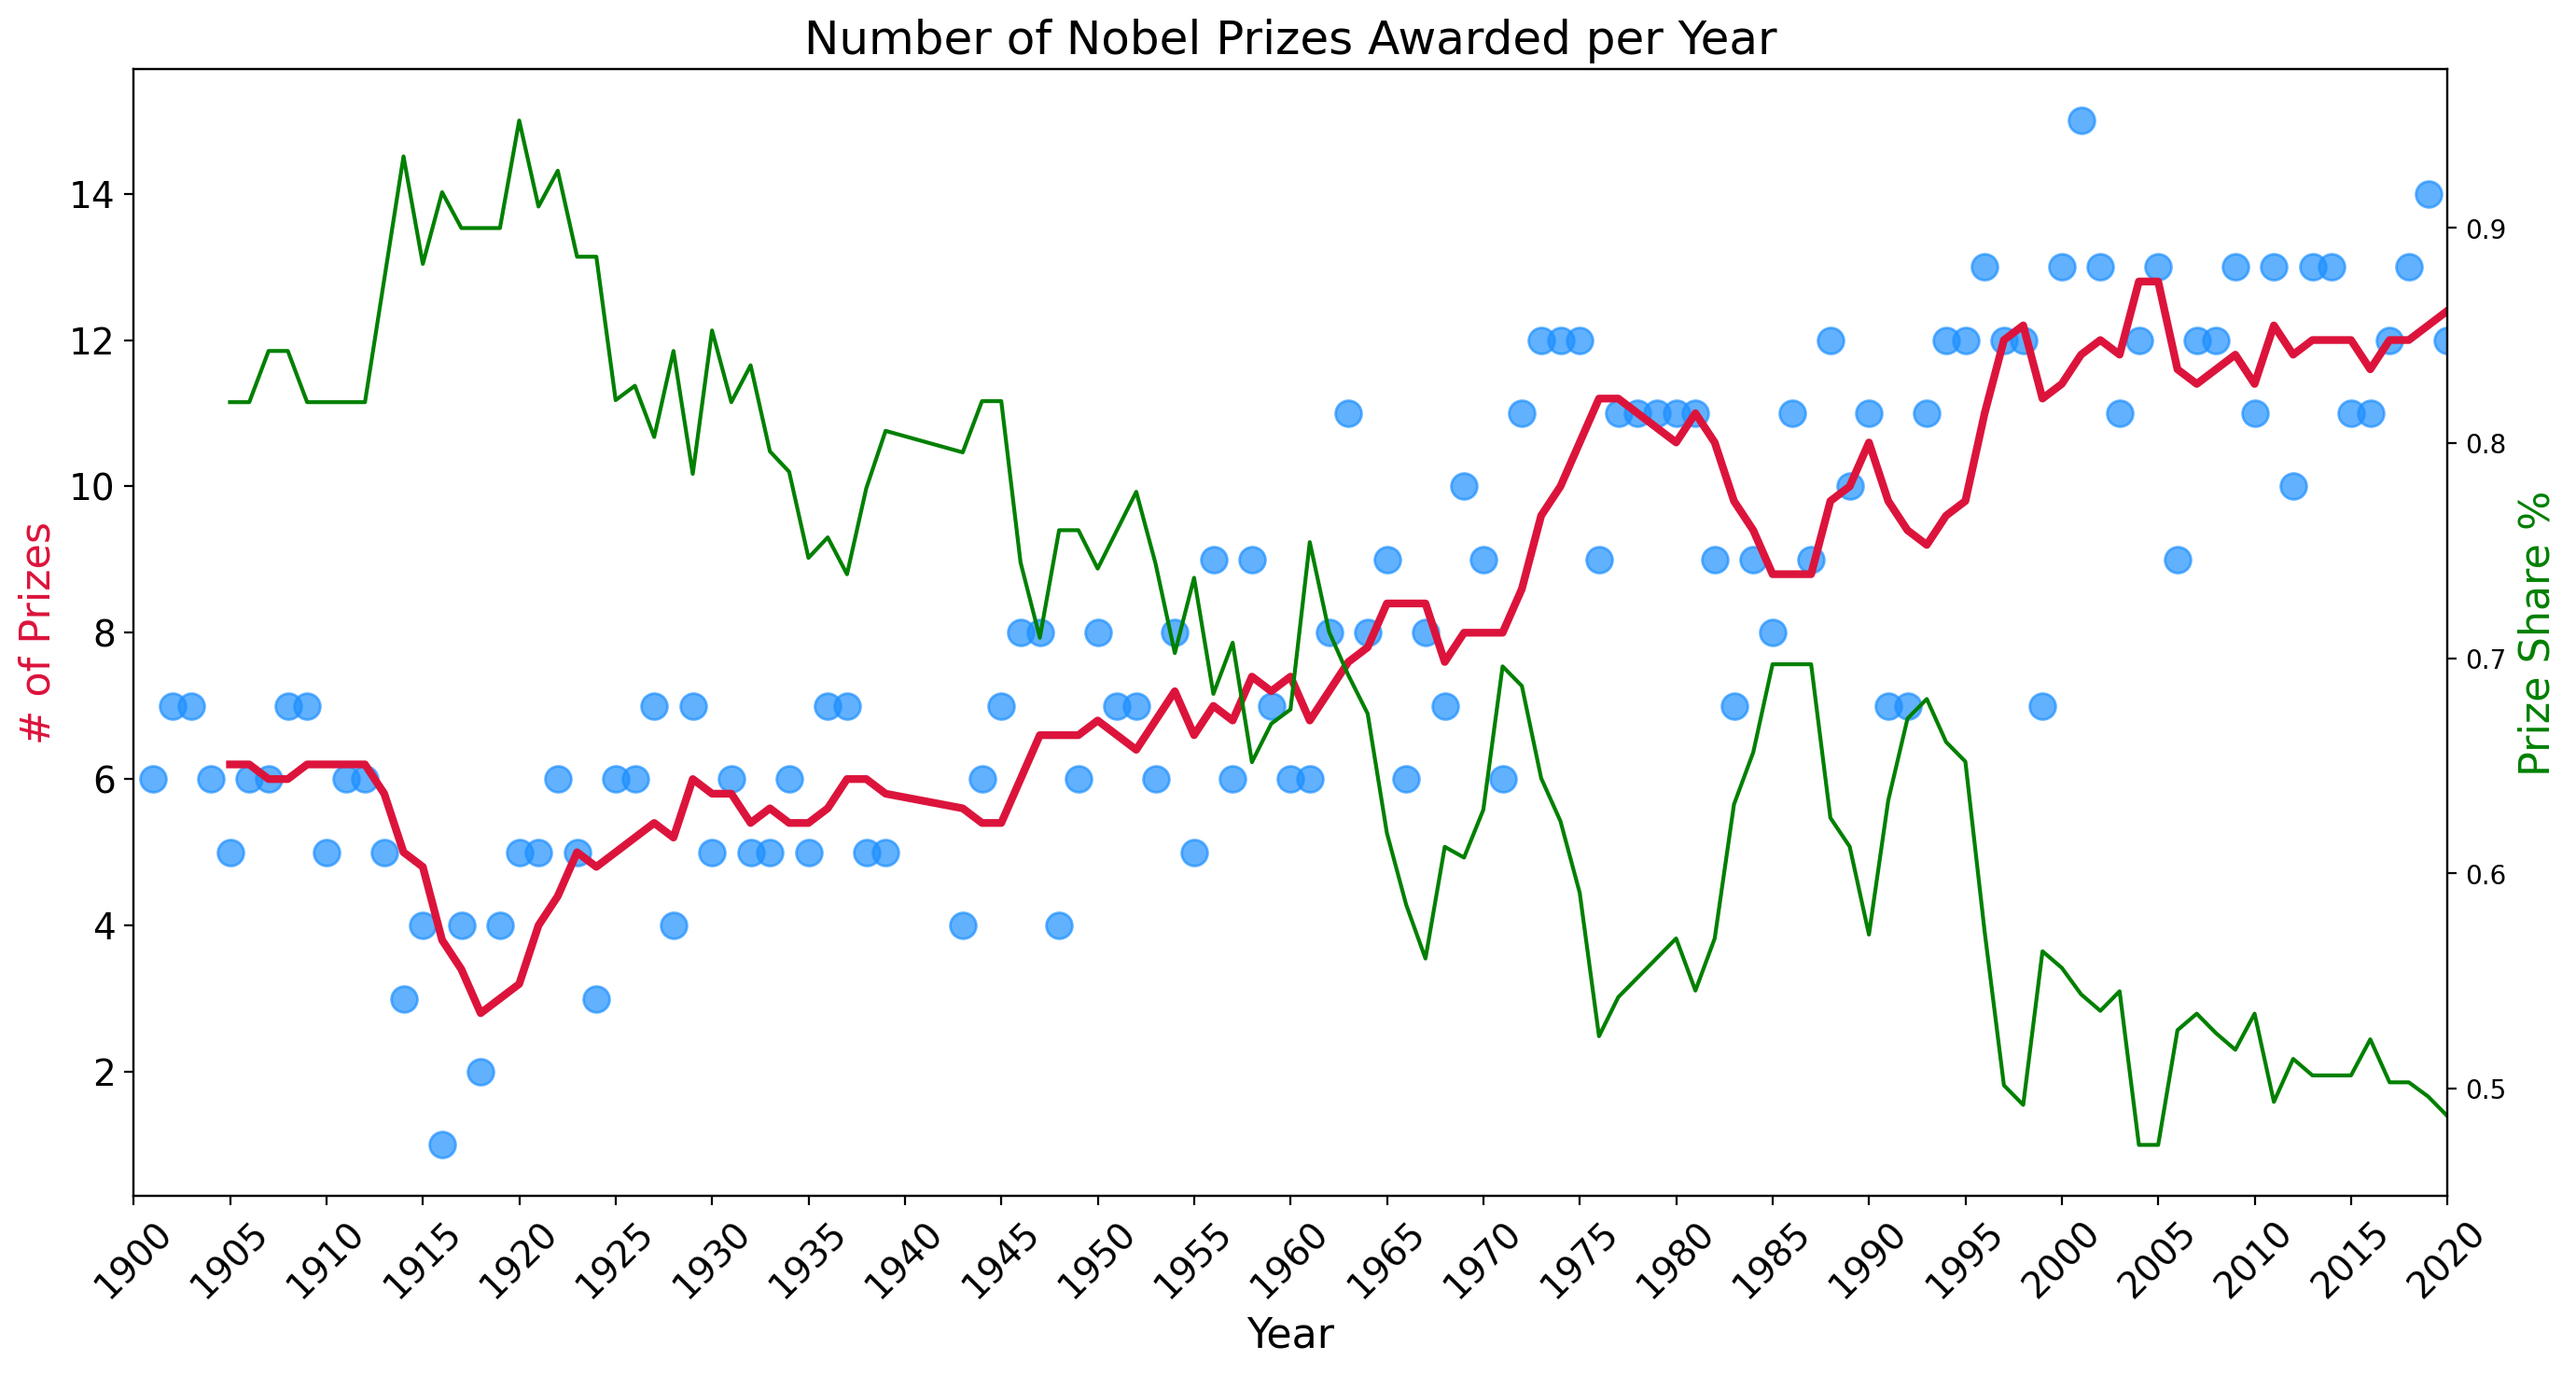

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax1 = ax.twinx()
ax.set_xlim(1900, 2020)

ax1.plot(percent_rolling.index,
         percent_rolling.values,
         c='green')

ax1.set_ylabel("Prize Share %", color='green', fontsize=16)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

ax.set_ylabel('# of Prizes', color='crimson', fontsize=16) 
ax.set_xlabel('Year', fontsize=16)


Text(0.5, 0, 'Year')

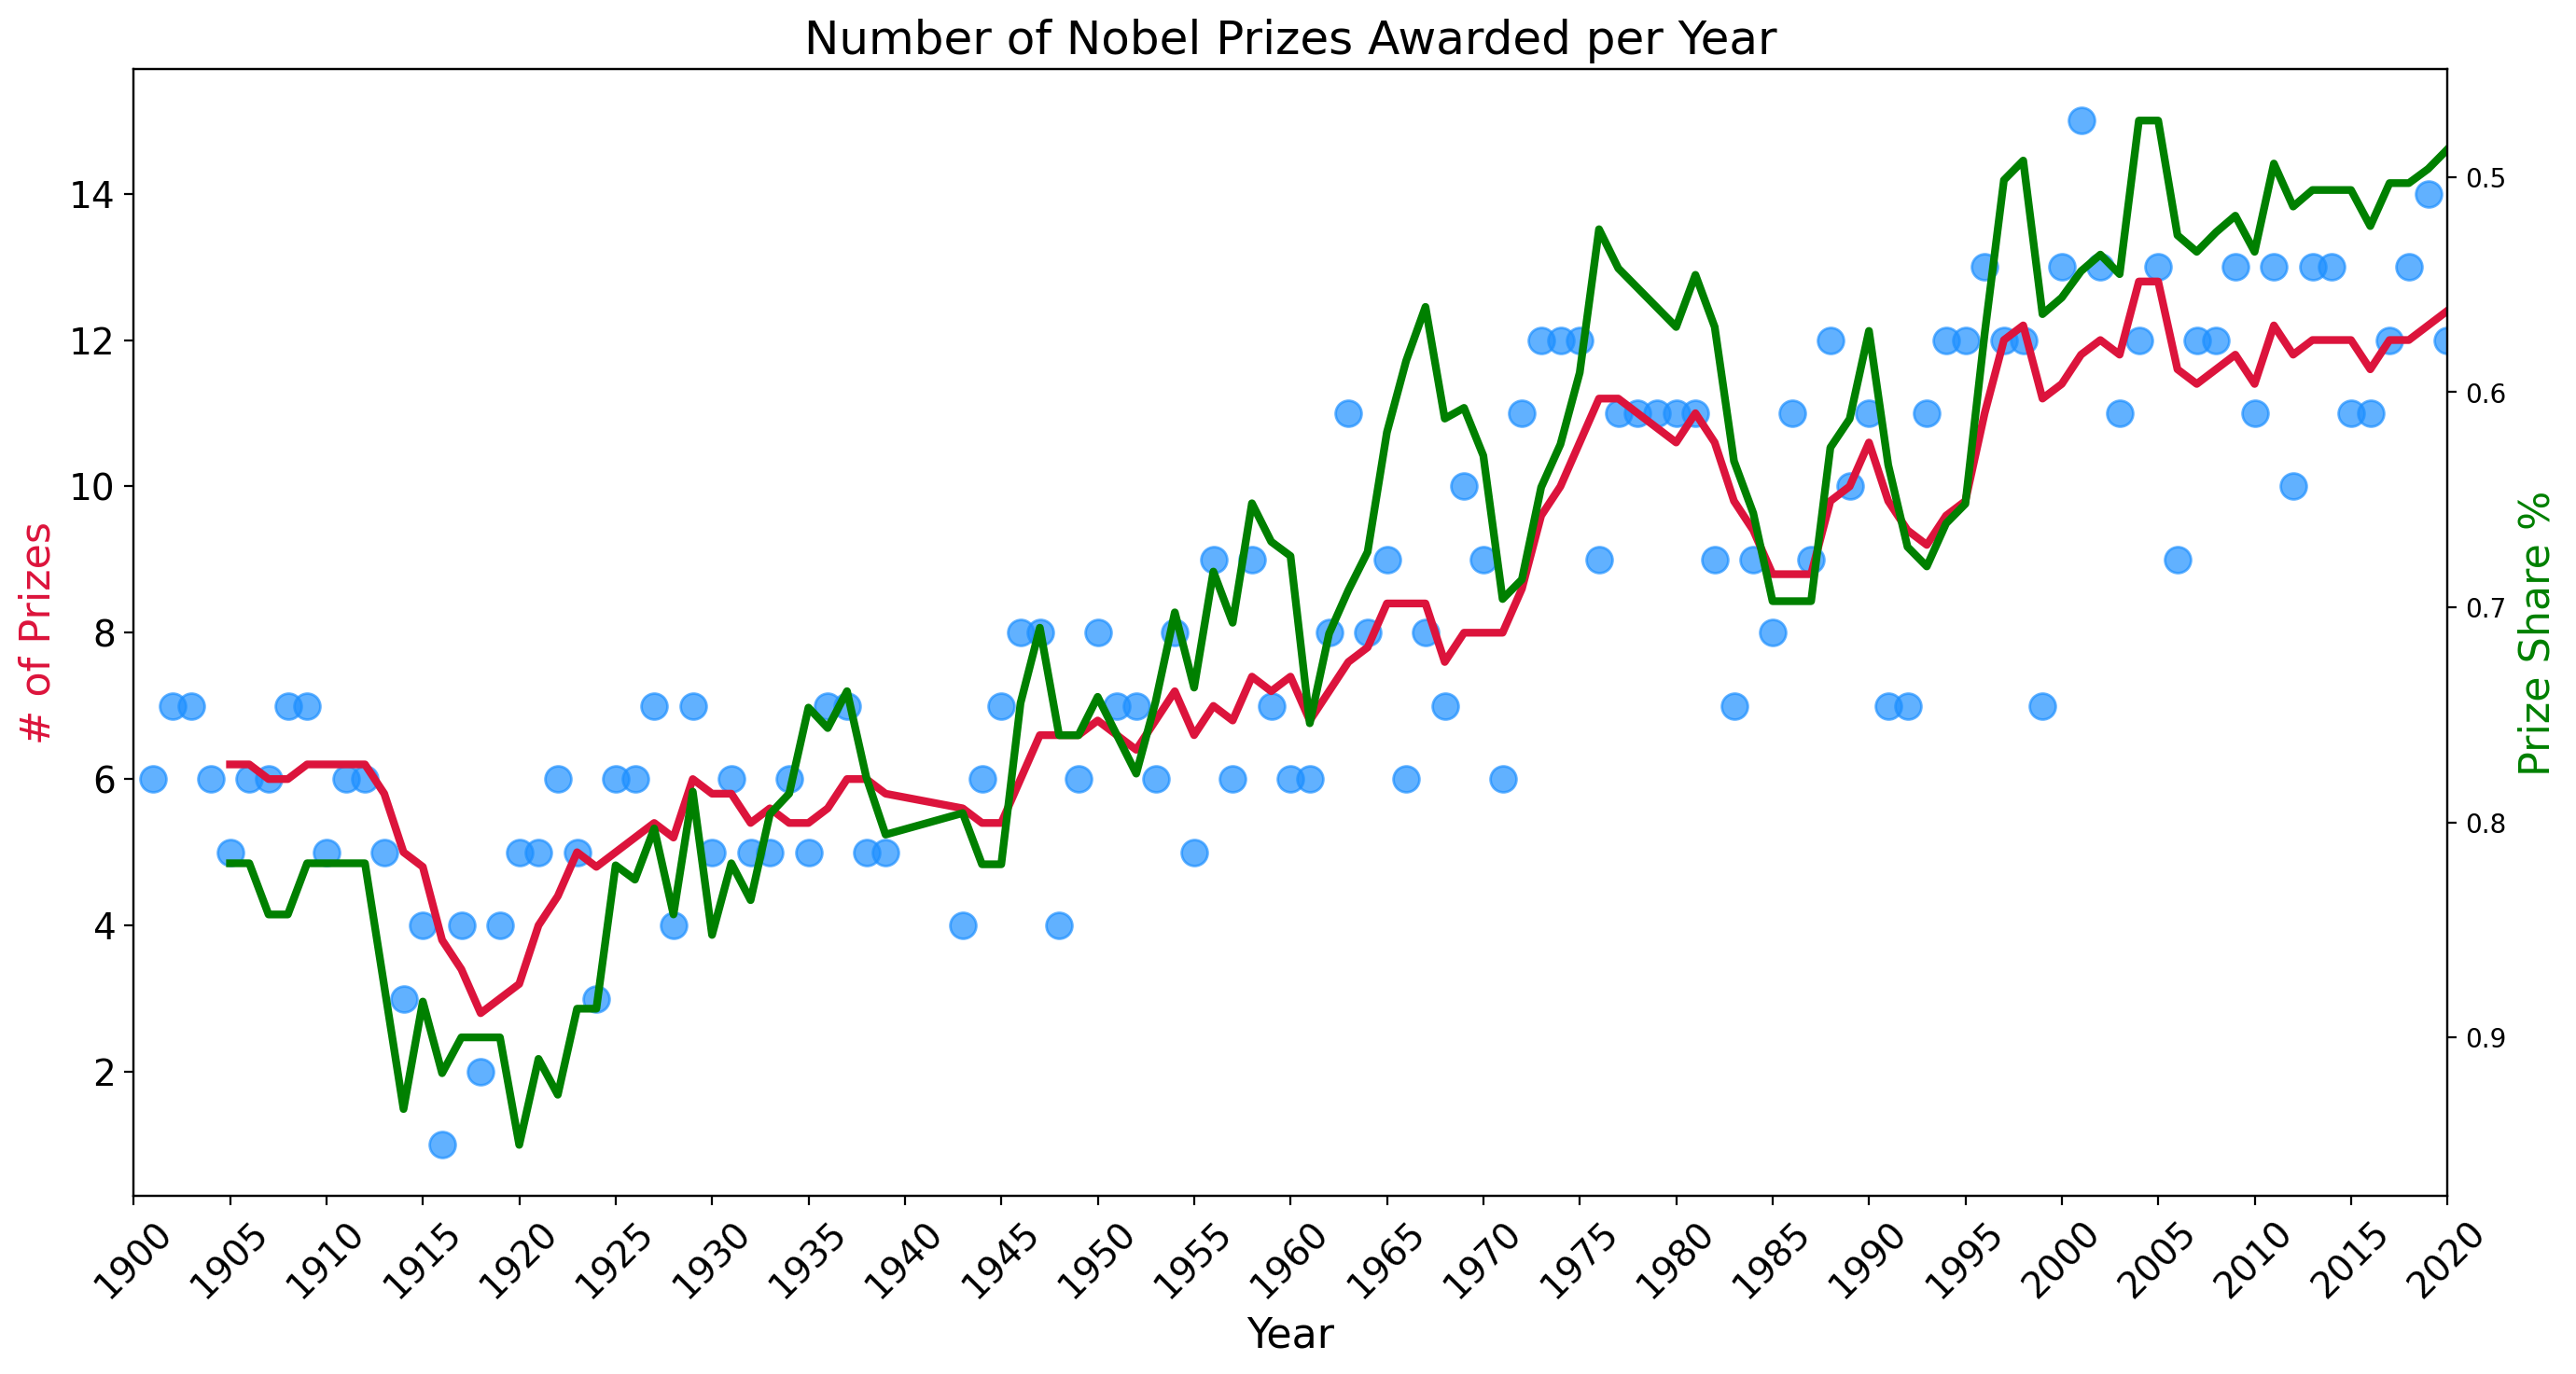

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax1 = ax.twinx()
ax1.invert_yaxis() #inverted y axis
ax.set_xlim(1900, 2020)

ax1.plot(percent_rolling.index,
         percent_rolling.values,
         c='green',
         linewidth=3)

ax1.set_ylabel("Prize Share %", color='green', fontsize=16)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

ax.set_ylabel('# of Prizes', color='crimson', fontsize=16) 
ax.set_xlabel('Year', fontsize=16)


# The Countries with the Most Nobel Prizes

In [ ]:
top_20 = df_data.groupby('birth_country_current').prize.count()
top_20.sort_values(ascending=True, inplace=True,)

In [ ]:
bar = px.bar(y=top_20.index[-20:], x=top_20.values[-20:], 
             orientation='h',
             color=top_20.values[-20:],
             log_x=False,
             color_continuous_scale='Viridis',
             title='Top 20 Countries by Number of Prizes')
bar.update_layout(xaxis_title="# of Prizes",
                  yaxis_title="Country")

bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [ ]:
countries = df_data.groupby(['birth_country_current','ISO'], as_index=False).agg({'prize':pd.Series.count})
countries

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [ ]:
fig = px.choropleth(countries, 
                    locations=countries.ISO,
                    color=countries.prize, # lifeExp is a column of gapminder
                    color_continuous_scale='matter',
                    hover_name='birth_country_current')
fig.update_layout(height=500, width=800)
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 



In [ ]:
cat_country = df_data.groupby(['birth_country_current','category'], as_index=False).agg({'prize':pd.Series.count})
merged_df = pd.merge(cat_country, top_20, on='birth_country_current')
merged_df.columns = ['birth_country', 'category', 'prize', 'total_prizes']
merged_df.sort_values('total_prizes', ascending=False, inplace=True)
merged_df

,birth_country,category,prize,total_prizes
204,United States of America,Medicine,78,281
203,United States of America,Literature,10,281
201,United States of America,Chemistry,55,281
205,United States of America,Peace,19,281
206,United States of America,Physics,70,281
...,...,...,...,...
87,Iceland,Literature,1,1
79,Guadeloupe Island,Literature,1,1
188,Taiwan,Chemistry,1,1
189,Trinidad,Literature,1,1


In [ ]:
bar = px.bar(y=merged_df.birth_country[:94], x=merged_df.prize[:94], 
             orientation='h',
             color=merged_df.category[:94],
             log_x=False,
             color_continuous_scale='Viridis',
             title='Category of Prizes by Country',
             hover_name = merged_df.category[:94])
bar.update_layout(xaxis_title="# of Prizes",
                  yaxis_title="Country")

bar.show()

### Number of Prizes Won by Each Country Over Time


In [ ]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [ ]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?


In [ ]:
org_df = df_data.groupby(['organization_name'], as_index=False).agg({'prize':pd.Series.count})
org_df = org_df.sort_values('prize')[-20:]
org_df

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [ ]:
bar = px.bar(x=org_df.prize, y=org_df.organization_name, color=org_df.prize,
             title="# of Prizes by Institution",
             color_continuous_scale='aggrnyl')
bar.update_layout(xaxis_title='# of Prizes',
                  yaxis_title='Institution')
bar.show()

# Which Cities Make the Most Discoveries? 



In [ ]:
city_df = df_data.groupby(['organization_city'], as_index=False).agg({'prize':pd.Series.count})
city_df = city_df.sort_values('prize')[-20:]
city_df

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


In [ ]:
bar = px.bar(x=city_df.prize, y=city_df.organization_city, color=city_df.prize,
             title="# of Prizes by City",
             color_continuous_scale='geyser')
bar.update_layout(xaxis_title='# of Prizes',
                  yaxis_title='City')
bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 




In [ ]:
birth_df = df_data.groupby(['birth_city'], as_index=False).agg({'prize':pd.Series.count})
birth_df = birth_df.sort_values('prize')[-20:]
birth_df

,birth_city,prize
343,"Milwaukee, WI",3
87,Cairo,4
356,Montreal,4
428,"Pittsburgh, PA",4
167,Frankfurt-on-the-Main,5
440,Prague,5
515,Stockholm,6
210,Hamburg,6
363,Munich,7
358,Moscow,7


In [ ]:
bar = px.bar(x=birth_df.prize, y=birth_df.birth_city, color=birth_df.prize,
             title="# of Prizes by City",
             color_continuous_scale='sunset')
bar.update_layout(xaxis_title='# of Prizes',
                  yaxis_title='City')
bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation




In [ ]:
sunburst_df = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize':pd.Series.count})
sunburst_df = sunburst_df.sort_values('prize')
sunburst_df.tail()

,organization_country,organization_city,organization_name,prize
195,United States of America,"Berkeley, CA",University of California,19
209,United States of America,"Chicago, IL",University of Chicago,20
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
280,United States of America,"Stanford, CA",Stanford University,23
205,United States of America,"Cambridge, MA",Harvard University,29


In [ ]:
fig = px.sunburst(
    sunburst_df,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    title='Where do Discoveries Take Place?',
    color='organization_country',
    color_continuous_scale='RdBu')

fig.show()

# Patterns in the Laureate Age at the Time of the Award




In [ ]:
dates = df_data.birth_date.dt.year
df_data['winning_age'] = df_data.year - dates 
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
213,1944,Medicine,The Nobel Prize in Physiology or Medicine 1944,"""for their discoveries relating to the highly ...",1/2,Individual,Herbert Spencer Gasser,1888-07-05,"Platteville, WI",United States of America,United States of America,Male,Rockefeller Institute for Medical Research,"New York, NY",United States of America,USA,0.50,56.00


### Who were the oldest and youngest winners?


In [ ]:
df_data[df_data.winning_age == df_data.winning_age.max()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [ ]:
df_data[df_data.winning_age == df_data.winning_age.min()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [ ]:
df_data.winning_age.mean()

59.94860813704497

In [ ]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [ ]:
age = df_data.groupby(['winning_age'], as_index=False).agg({'prize':pd.Series.count})
age.sort_values('prize', ascending=False)

,winning_age,prize
34,63.00,35
27,56.00,34
32,61.00,33
31,60.00,31
39,68.00,30
...,...,...
62,96.00,1
61,90.00,1
0,17.00,1
57,86.00,1


### Descriptive Statistics for the Laureate Age at Time of Award

  

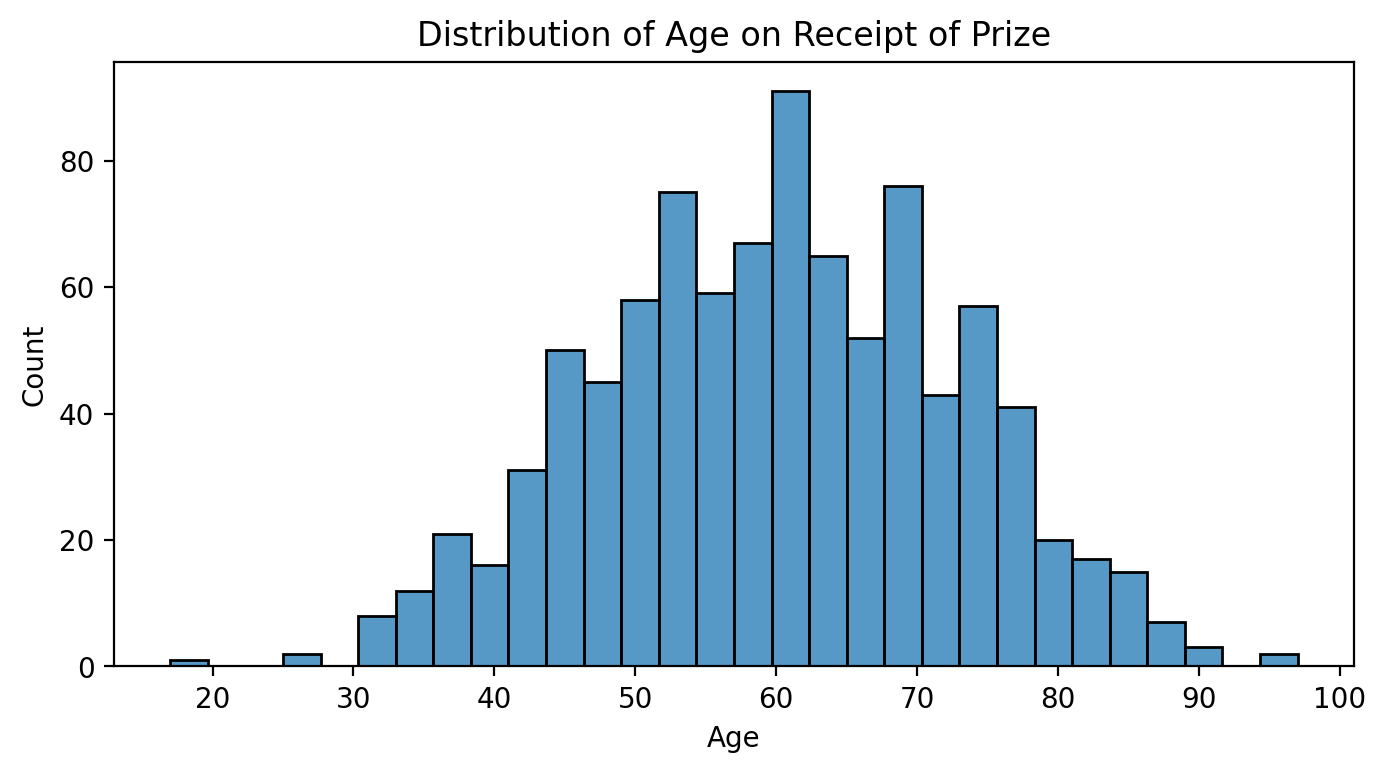

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



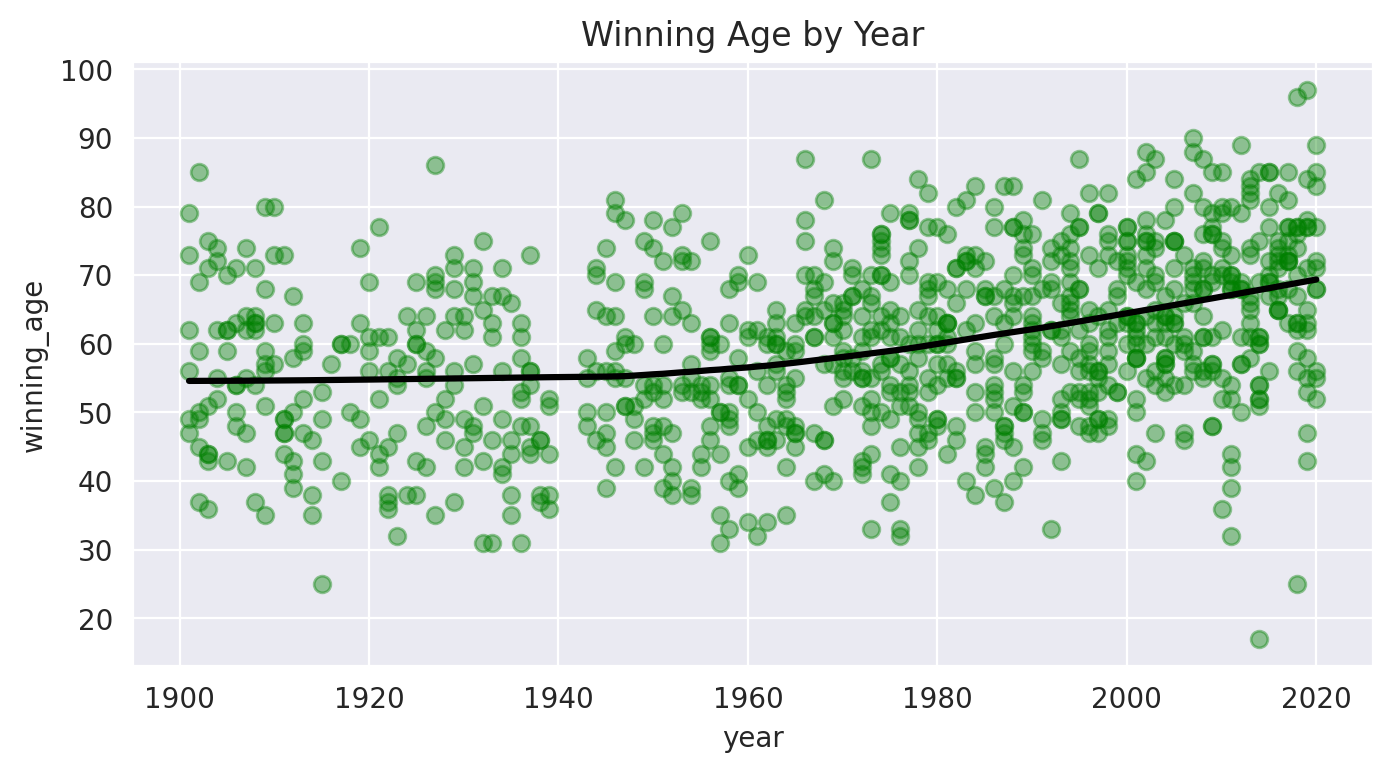

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  plot = sns.regplot(data=df_data,
            x='year',
            y='winning_age',
            lowess=True, 
            scatter_kws = {'alpha': 0.4},
            line_kws={'color': 'black'},
            color='green')
  
plot.set(xlabel='year',
         title='Winning Age by Year')
  
plt.show()

### Winning Age Across the Nobel Prize Categories


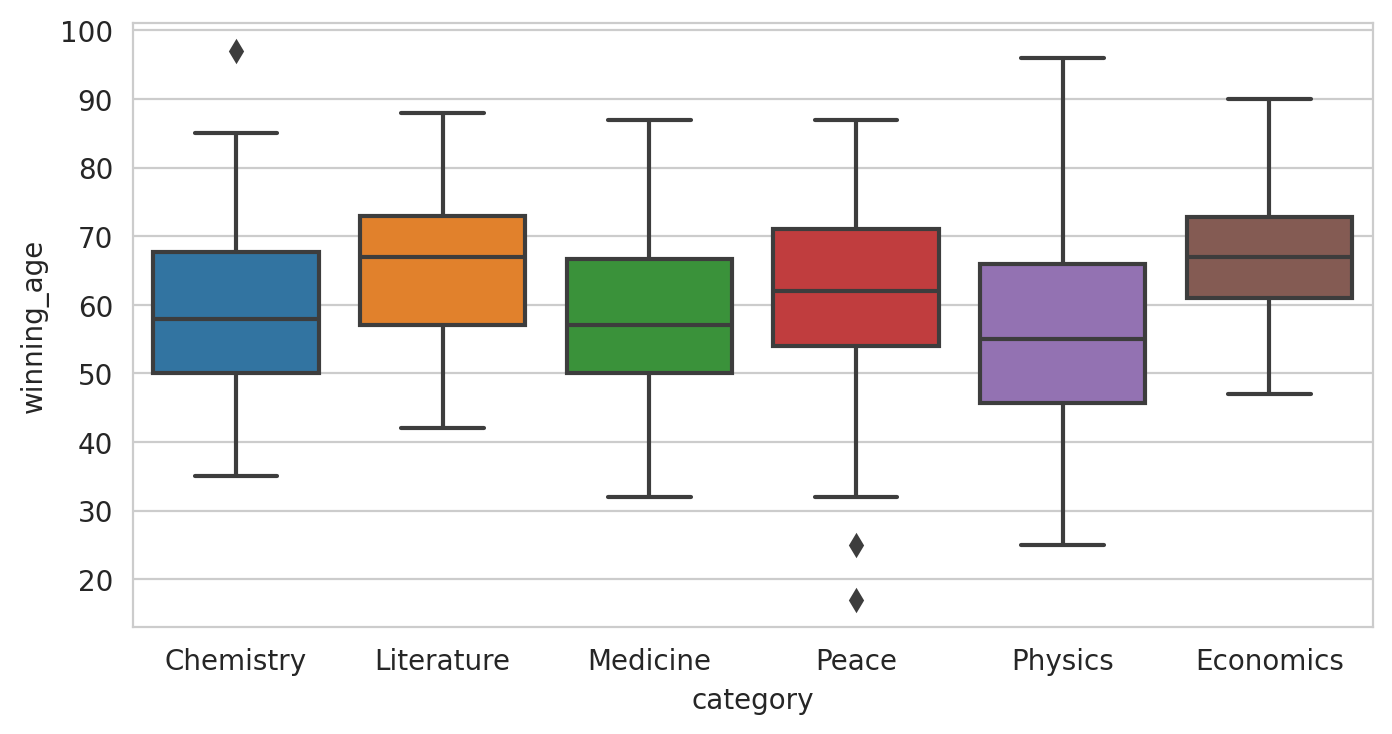

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.boxplot(x=df_data.category, y=df_data.winning_age)
plt.show()

<Figure size 1600x1200 with 0 Axes>

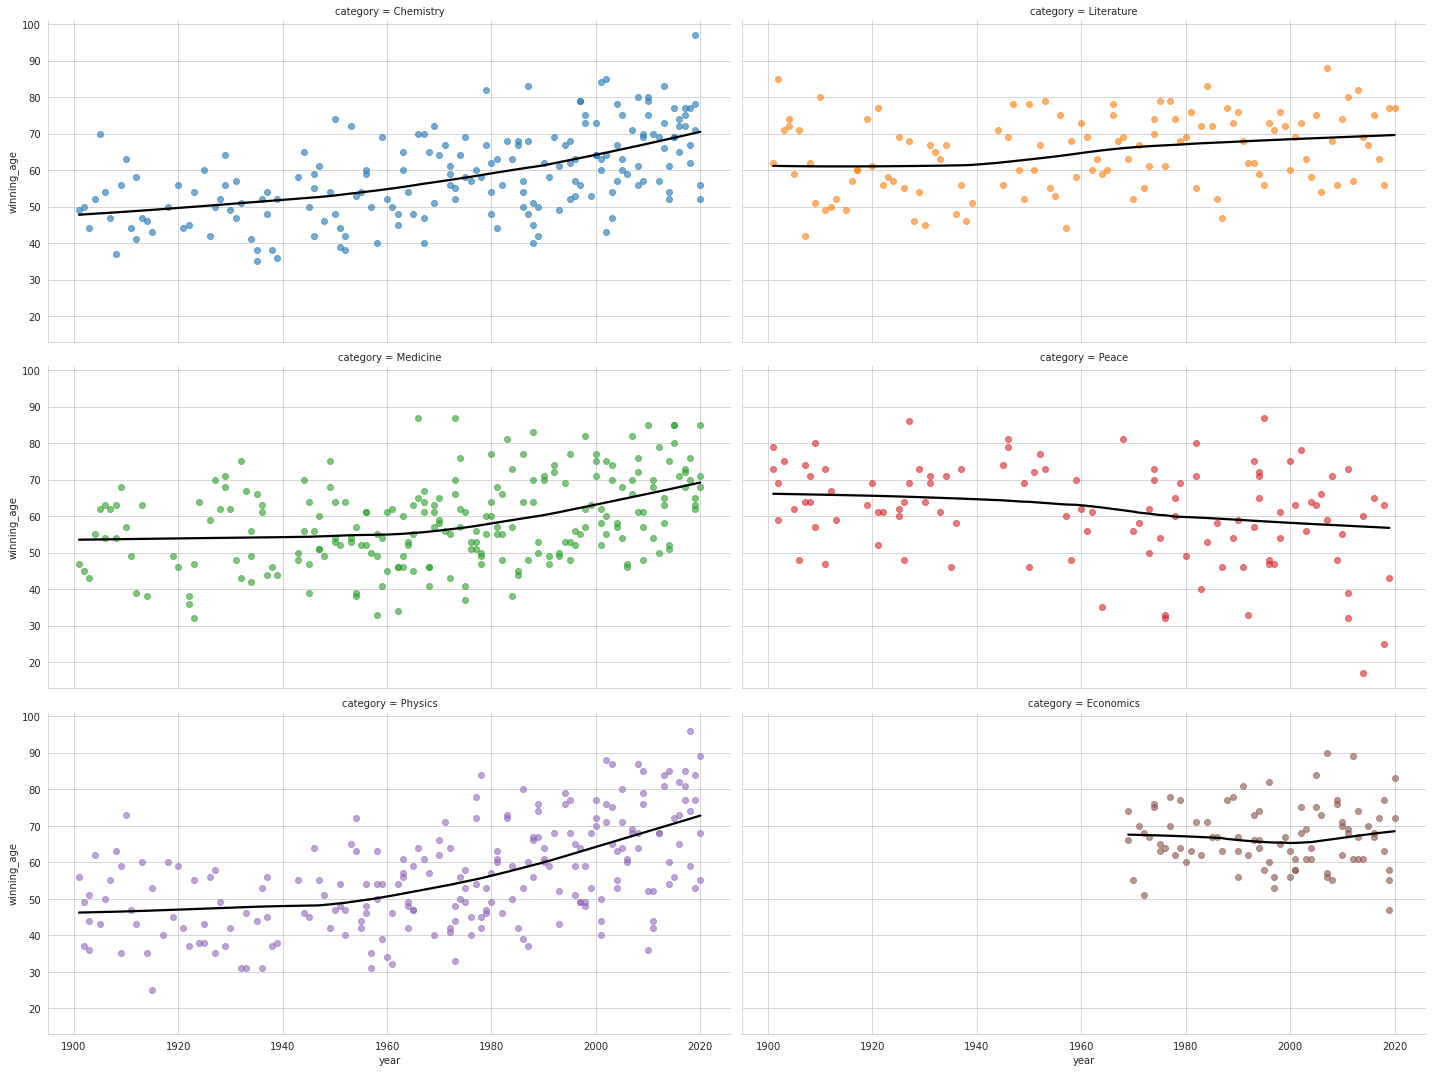

In [ ]:
plt.figure(figsize=(8,6), dpi=200)

with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               hue='category',
               col='category',
               col_wrap=2,
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
plt.show()